**Problem Statement:** 
    
Hospital X based on the previous data they have,is trying to identify which of its patients would require a Therapy.

1)      We would like to understand your experience of analysing data

2)      Bring in insights out of the data

3)      Build probabilistic classifier model to solve the problem. We would like to see the probabilistic scores for each of the prediction you have made on the prediction dataset.

**Breast Cancer Data Description**

Citation Request:
   This breast cancer domain was obtained from the University Medical Centre,
   Institute of Oncology, Ljubljana, Yugoslavia.  Thanks go to M. Zwitter and 
   M. Soklic for providing the data.  Please include this citation if you plan
   to use this database.

1. Title: Breast cancer data (Michalski has used this)

2. Attribute Information:
   1. Class(Indicator for first occurrence or reocurrence ): no-recurrence-events, recurrence-events 
   2. age(Age of the Patient): 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.
   3. menopause(Menopause Stage of the patient, lt40:late40, ge40:gestational40, premeno:Pre-menopause) :lt40, ge40, premeno.
   4. tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59.
   5. inv-nodes(Lymph nodes): 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26,27-29, 30-32, 33-35, 36-39.
   6. node-caps(capping of inv-nodes): yes, no.
   7. deg-malig(degree of malignancy): 1, 2, 3.
   8. breast: left, right.
   9. breast-quad: left-up, left-low, right-up,	right-low, central.
  10. irradiat(Target Variable, Radiation Therapy Yes/No):	yes, no.


### Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Importing of train and test Dataset

In [2]:
df_train=pd.read_excel(r"Train_Breast_Cancer.xlsx")
df_test=pd.read_excel(r"Test_Breast_Cancer.xlsx")

### First Five Rows in the Train Dataset

In [3]:
df_train.head()

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


## Bottom Five Rows in the Train Dataset

In [4]:
df_train.tail()

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
268,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
269,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
270,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
271,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no
272,recurrence-events,50-59,ge40,30-34,3-5,no,3,left,left_low,no


## First Five Rows in the Test Dataset

In [5]:
df_test.head()

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
0,no-recurrence-events,30-39,premeno,25-29,6-8,yes,2,right,left_up,NaN
1,no-recurrence-events,50-59,premeno,25-29,NaN,yes,2,left,left_up,NaN
2,no-recurrence-events,40-49,premeno,35-39,9-11,yes,2,right,left_up,NaN
3,no-recurrence-events,40-49,premeno,35-39,9-11,yes,2,right,right_up,NaN
4,no-recurrence-events,40-49,premeno,40-44,3-5,yes,3,right,left_up,NaN


we see that there are NaN values present in the dataset for column Inv-nodes and our target "variable Irradiat"

### Bottom Five Rows in the Train Dataset

In [6]:
df_test.tail()

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
5,no-recurrence-events,40-49,premeno,30-34,6-8,no,2,left,left_up,NaN
6,no-recurrence-events,50-59,ge40,40-44,0-2,no,3,left,right_up,NaN
7,no-recurrence-events,60-69,ge40,30-34,NaN,no,2,left,left_low,NaN
8,no-recurrence-events,30-39,premeno,20-24,3-5,no,2,right,central,NaN
9,no-recurrence-events,30-39,premeno,40-44,3-5,no,3,right,right_up,NaN


we see that there are NaN values present in the dataset for column Inv-nodes and our target "variable Irradiat"

## Name of the Columns in train and test Dataset

In [7]:
print("Columns in the train dataset: \n",df_train.columns)
print("*"*100)
print("Columns in the train dataset: \n",df_test.columns)

Columns in the train dataset: 
 Index(['Class', 'Age', 'Menopause', 'Tumor-size', 'Inv-nodes', 'Node-caps', 'Deg-malig', 'Breast', 'Breast-quad', 'Irradiat'], dtype='object')
****************************************************************************************************
Columns in the train dataset: 
 Index(['Class', 'Age', 'Menopause', 'Tumor-size', 'Inv-nodes', 'Node-caps', 'Deg-malig', 'Breast', 'Breast-quad', 'Irradiat'], dtype='object')


## Shape of train and test Dataset

In [8]:
print("There are total %d columns in the train dataset." %df_train.shape[1])
print("There are total %d rows in the train dataset." %df_train.shape[0])
print("*"*100)
print("There are total %d columns in the test dataset." %df_test.shape[1])
print("There are total %d rows in the test dataset." %df_test.shape[0])

There are total 10 columns in the train dataset.
There are total 273 rows in the train dataset.
****************************************************************************************************
There are total 10 columns in the test dataset.
There are total 10 rows in the test dataset.


## Information of train and test Dataset

In [9]:
print(df_train.info(verbose=True,null_counts=True))
print("*"*100)      
print(df_test.info(verbose=True,null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        273 non-null    object
 1   Age          273 non-null    object
 2   Menopause    273 non-null    object
 3   Tumor-size   273 non-null    object
 4   Inv-nodes    273 non-null    object
 5   Node-caps    273 non-null    object
 6   Deg-malig    273 non-null    int64 
 7   Breast       273 non-null    object
 8   Breast-quad  273 non-null    object
 9   Irradiat     273 non-null    object
dtypes: int64(1), object(9)
memory usage: 21.5+ KB
None
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Class        10 non-null     object 
 1   Age          

## Determing the  of train and test Dataset

In [10]:
print(df_train.dtypes)
print("*"*100)      
print(df_test.dtypes)

Class          object
Age            object
Menopause      object
Tumor-size     object
Inv-nodes      object
Node-caps      object
Deg-malig       int64
Breast         object
Breast-quad    object
Irradiat       object
dtype: object
****************************************************************************************************
Class           object
Age             object
Menopause       object
Tumor-size      object
Inv-nodes       object
Node-caps       object
Deg-malig        int64
Breast          object
Breast-quad     object
Irradiat       float64
dtype: object


As per the Description the columns should be Categorical Datatype

Observation:
    The columns are object type

## No of Unique Values in train and test Dataset

In [11]:
print(df_train.nunique())
print("*"*100)
print(df_test.nunique())

Class           2
Age             6
Menopause       3
Tumor-size     11
Inv-nodes       7
Node-caps       3
Deg-malig       3
Breast          2
Breast-quad     6
Irradiat        2
dtype: int64
****************************************************************************************************
Class          1
Age            4
Menopause      2
Tumor-size     5
Inv-nodes      4
Node-caps      2
Deg-malig      2
Breast         2
Breast-quad    4
Irradiat       0
dtype: int64


## No of Duplicate Values in train and test Dataset

In [12]:
print("There is {} duplicated values in data frame".format(df_train.duplicated().sum()))
print("*"*100)
print("There is {} duplicated values in data frame".format(df_test.duplicated().sum()))

There is 14 duplicated values in data frame
****************************************************************************************************
There is 0 duplicated values in data frame


Observation:
    There are 14 rows in the trai dataset which are duplicate, which may cause anamoly in the prediction

## Display of Duplicate rows in train Dataset

In [13]:
df_train.loc[df_train.duplicated(), :]

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
21,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
78,no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
91,no-recurrence-events,50-59,ge40,20-24,0-2,no,3,left,left_up,no
97,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
111,no-recurrence-events,50-59,ge40,15-19,0-2,no,1,right,central,no
112,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no
113,no-recurrence-events,40-49,premeno,10-14,0-2,no,1,right,left_up,no
120,no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
132,no-recurrence-events,60-69,ge40,10-14,0-2,no,1,left,left_up,no
160,no-recurrence-events,30-39,premeno,15-19,0-2,no,1,left,left_low,no


## Display of Duplicate rows in train Dataset

In [14]:
df_train.drop_duplicates(inplace=True)

## Shape of train and test Dataset after dropping the duplicate values

In [15]:
print("There are total %d columns in the train dataset after droping duplicate values." %df_train.shape[1])
print("There are total %d observations in the train dataset after droping duplicate values." %df_train.shape[0])
print("*"*100)
print("There are total %d columns in the test dataset after droping duplicate values." %df_test.shape[1])
print("There are total %d observations in the test dataset after droping duplicate values." %df_test.shape[0])

There are total 10 columns in the train dataset after droping duplicate values.
There are total 259 observations in the train dataset after droping duplicate values.
****************************************************************************************************
There are total 10 columns in the test dataset after droping duplicate values.
There are total 10 observations in the test dataset after droping duplicate values.


## Determing the Missing values from the Train dataset

In [16]:
df_train.isnull().sum().to_frame().reset_index().set_axis(['Column_Name','Missing_Values'], axis=1)

,Column_Name,Missing_Values
0,Class,0
1,Age,0
2,Menopause,0
3,Tumor-size,0
4,Inv-nodes,0
5,Node-caps,0
6,Deg-malig,0
7,Breast,0
8,Breast-quad,0
9,Irradiat,0


Observation:
    There are no Missing Values in the train dataset

## Determing the Missing values from the Test dataset

In [17]:
df_test.isnull().sum().to_frame().reset_index().set_axis(['Column_Name','Missing_Values'], axis=1)

,Column_Name,Missing_Values
0,Class,0
1,Age,0
2,Menopause,0
3,Tumor-size,0
4,Inv-nodes,2
5,Node-caps,0
6,Deg-malig,0
7,Breast,0
8,Breast-quad,0
9,Irradiat,10


Observation:
    There are 2 columns in the train dataset where there are missing values

## Determing the Null values from the Train dataset

In [18]:
df_train.isna().sum().to_frame().reset_index().set_axis(['Column_Name','Null_Values'], axis=1)

,Column_Name,Null_Values
0,Class,0
1,Age,0
2,Menopause,0
3,Tumor-size,0
4,Inv-nodes,0
5,Node-caps,0
6,Deg-malig,0
7,Breast,0
8,Breast-quad,0
9,Irradiat,0


Observation:
    There are no NAN Values in the train dataset

## Determing the Null values from the Train dataset

In [19]:
df_test.isnull().sum().to_frame().reset_index().set_axis(['Column_Name','Missing_Values'], axis=1)

,Column_Name,Missing_Values
0,Class,0
1,Age,0
2,Menopause,0
3,Tumor-size,0
4,Inv-nodes,2
5,Node-caps,0
6,Deg-malig,0
7,Breast,0
8,Breast-quad,0
9,Irradiat,10


Observation:
    There are 2 columns in the train dataset where there are NAN values

## Imputing the missing values in the Test Data Set with the mode

In [20]:
df_test['Inv-nodes'] = df_test['Inv-nodes'].replace(np.NaN,"0-2")

## Displaying the Test Dataset after imputing of the missing values

In [21]:
df_test.head(10)

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
0,no-recurrence-events,30-39,premeno,25-29,6-8,yes,2,right,left_up,NaN
1,no-recurrence-events,50-59,premeno,25-29,0-2,yes,2,left,left_up,NaN
2,no-recurrence-events,40-49,premeno,35-39,9-11,yes,2,right,left_up,NaN
3,no-recurrence-events,40-49,premeno,35-39,9-11,yes,2,right,right_up,NaN
4,no-recurrence-events,40-49,premeno,40-44,3-5,yes,3,right,left_up,NaN
5,no-recurrence-events,40-49,premeno,30-34,6-8,no,2,left,left_up,NaN
6,no-recurrence-events,50-59,ge40,40-44,0-2,no,3,left,right_up,NaN
7,no-recurrence-events,60-69,ge40,30-34,0-2,no,2,left,left_low,NaN
8,no-recurrence-events,30-39,premeno,20-24,3-5,no,2,right,central,NaN
9,no-recurrence-events,30-39,premeno,40-44,3-5,no,3,right,right_up,NaN


## Determining the distribution of the Target Variable

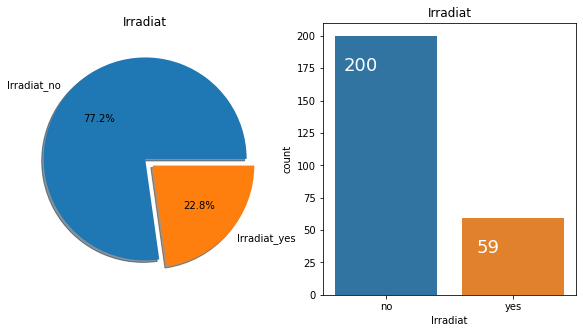

In [22]:
f,ax=plt.subplots(1,2,figsize=(10,5))
labels='Irradiat_no','Irradiat_yes'
df_train['Irradiat'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True,labels=labels,ax=ax[0])
ax[0].set_title('Irradiat')
ax[0].set_ylabel('')
sns.countplot('Irradiat',data=df_train,ax=ax[1])
for p in ax[1].patches:
    ax[1].annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
ax[1].set_title('Irradiat')
plt.show()

Observation:
    - There are total 259 unique rows on which we are working 
    - Out of these 259, we have 59 rows where the patient is undergoing therapy appox 23% percent
    - The balance 200 people donot require therapy and the percentage of such patients is 77%
    - We clearly identify that the data is uneven

## Converting the object type columns to categorical datatype in the train dataset

In [23]:
for i in df_train.columns:
    if 'object' in str(df_train[str(i)].dtype):
       df_train[str(i)]=df_train[str(i)].astype('category').cat.codes        
df_train.head()

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
0,0,1,2,5,0,1,3,0,2,0
1,0,2,2,3,0,1,2,1,5,0
2,0,2,2,3,0,1,2,0,2,0
3,0,4,0,2,0,1,2,1,3,0
4,0,2,2,0,0,1,2,1,4,0


## Converting the object type columns to categorical datatype in the test dataset

In [24]:
for i in df_test.columns:
    if 'object' in str(df_test[str(i)].dtype):
       df_test[str(i)]=df_test[str(i)].astype('category').cat.codes        
df_test.head()

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
0,0,0,1,1,2,1,2,1,2,NaN
1,0,2,1,1,0,1,2,0,2,NaN
2,0,1,1,3,3,1,2,1,2,NaN
3,0,1,1,3,3,1,2,1,3,NaN
4,0,1,1,4,1,1,3,1,2,NaN


#### Upon conversion we see that there are erroneus values, imputing them with the mode as they are categorical columns

In [25]:
df_train['Node-caps']=df_train['Node-caps'].replace(0,df_train['Node-caps'].mode().loc[0])
df_train['Breast-quad']=df_train['Breast-quad'].replace(0,df_train['Breast-quad'].mode().loc[0])

## Determining the distribution of all the features with respect to the target variable

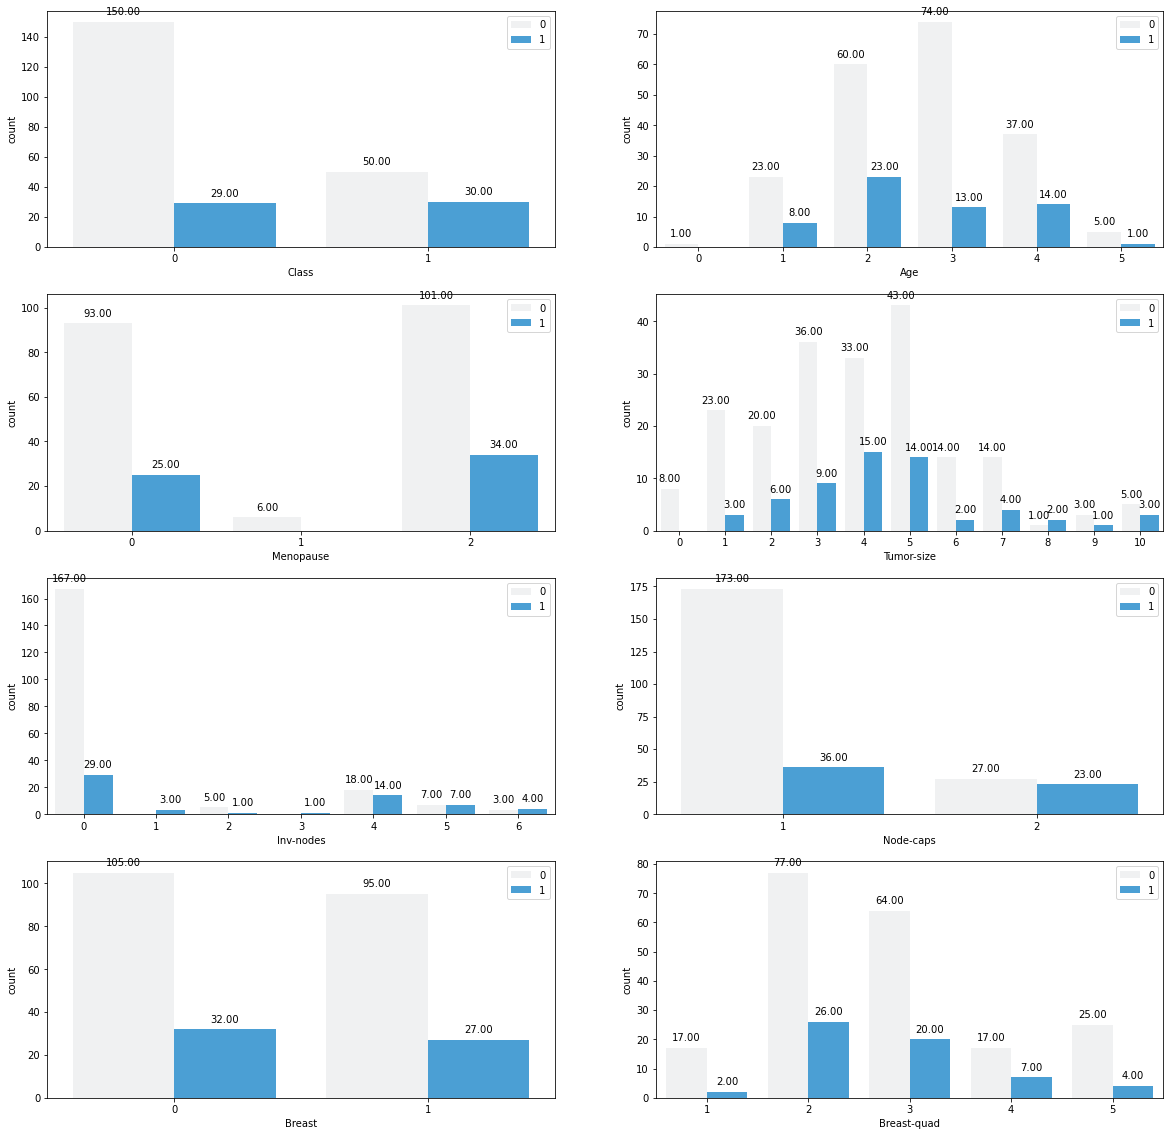

In [26]:
plt.figure(figsize=(20,20))
features = ['Class', 'Age', 'Menopause', 'Tumor-size', 'Inv-nodes', 'Node-caps', 'Breast', 'Breast-quad',]
for i in enumerate(features):
    plt.subplot(4,2,i[0]+1)
    splot =sns.countplot(x=i[1],hue='Irradiat',data=df_train,color="#34a4eb")
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        splot.legend(loc='best')

Observation:

  No Matter whether the patient has past events or no, the count for diagnosis of breast cancer and have undergone therapy
  
  Patients in the age group of 40-49 are more prone for diagnosis of breast cancer and have undergone therapy
  
  Patients who are in the premenopause and gestational40 are more prone for diagnosis of breast cancer and have undergone therapy
  
  Lymph nodes(0-2) are more prone for diagnosis of breast cancer and have undergone therapy
  
  patients with capping of inv-nodes are prone for diagnosis of breast cancer and have undergone therapy
  
  Both the breast are almost having the same count for breast cancer and have undergone therapy
  
  The right lower quad of the breast is more prone for breast cancerand have undergone therapy  

## Determining the distribution of the data

<Figure size 432x288 with 0 Axes>

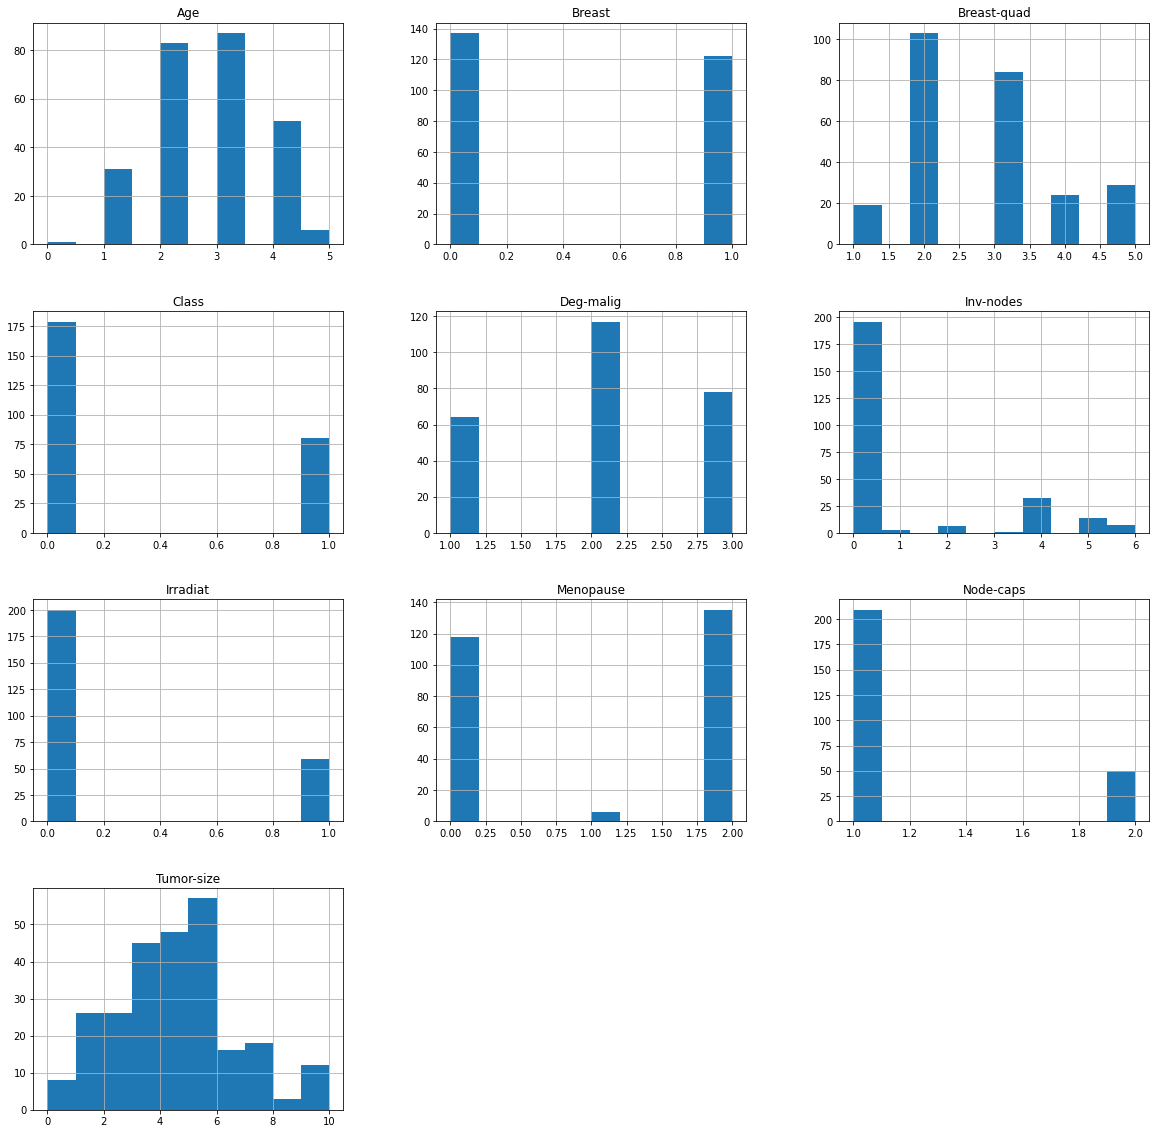

In [27]:
# see how the data is distributed.
fig = plt.figure()
df_train.hist(figsize=(20,20))
fig.savefig('Graph1.png')
plt.show()

In [28]:
import os
os.getcwd()

'C:\\Users\\DELL\\Desktop\\Breast_Canccer-Dataset_Description'

The Data is uniformly disributed across each column

### Determining the frequency distribution of the dataset variables wrt to the target variable

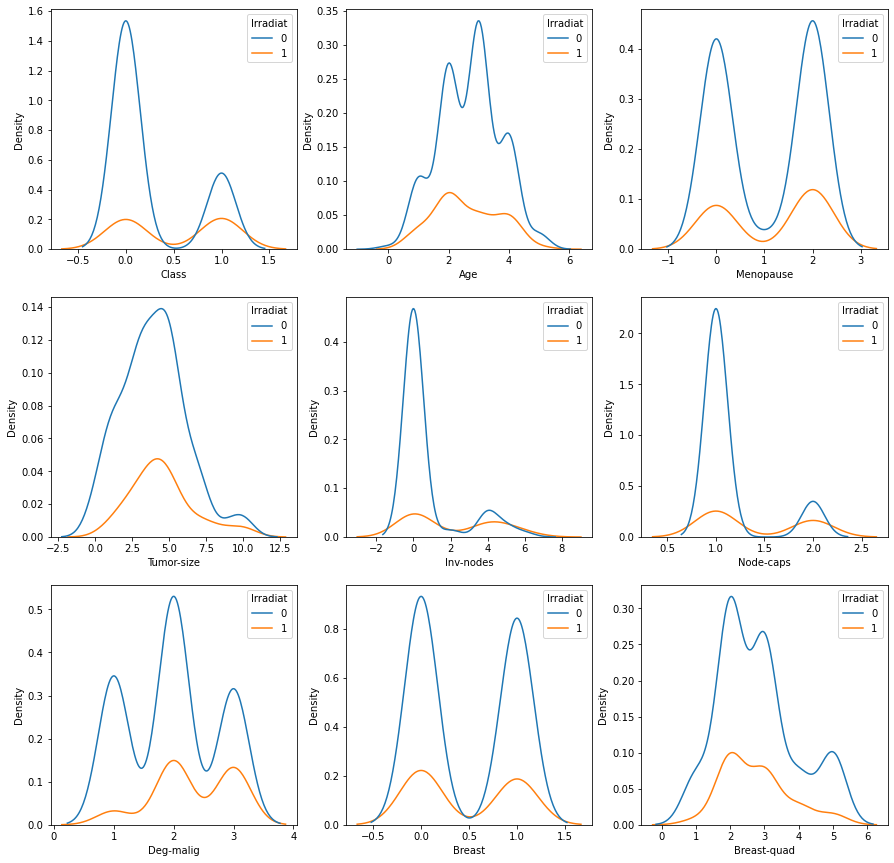

In [29]:
fig=plt.figure(figsize=(15,15))
features = ['Class', 'Age', 'Menopause', 'Tumor-size', 'Inv-nodes', 'Node-caps', 'Deg-malig','Breast', 'Breast-quad',]
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.kdeplot(x=i[1],hue='Irradiat',data=df_train,color="#34a4eb")
fig.savefig('Graph2.png')
plt.show()

## Determining the outliers in the dataset

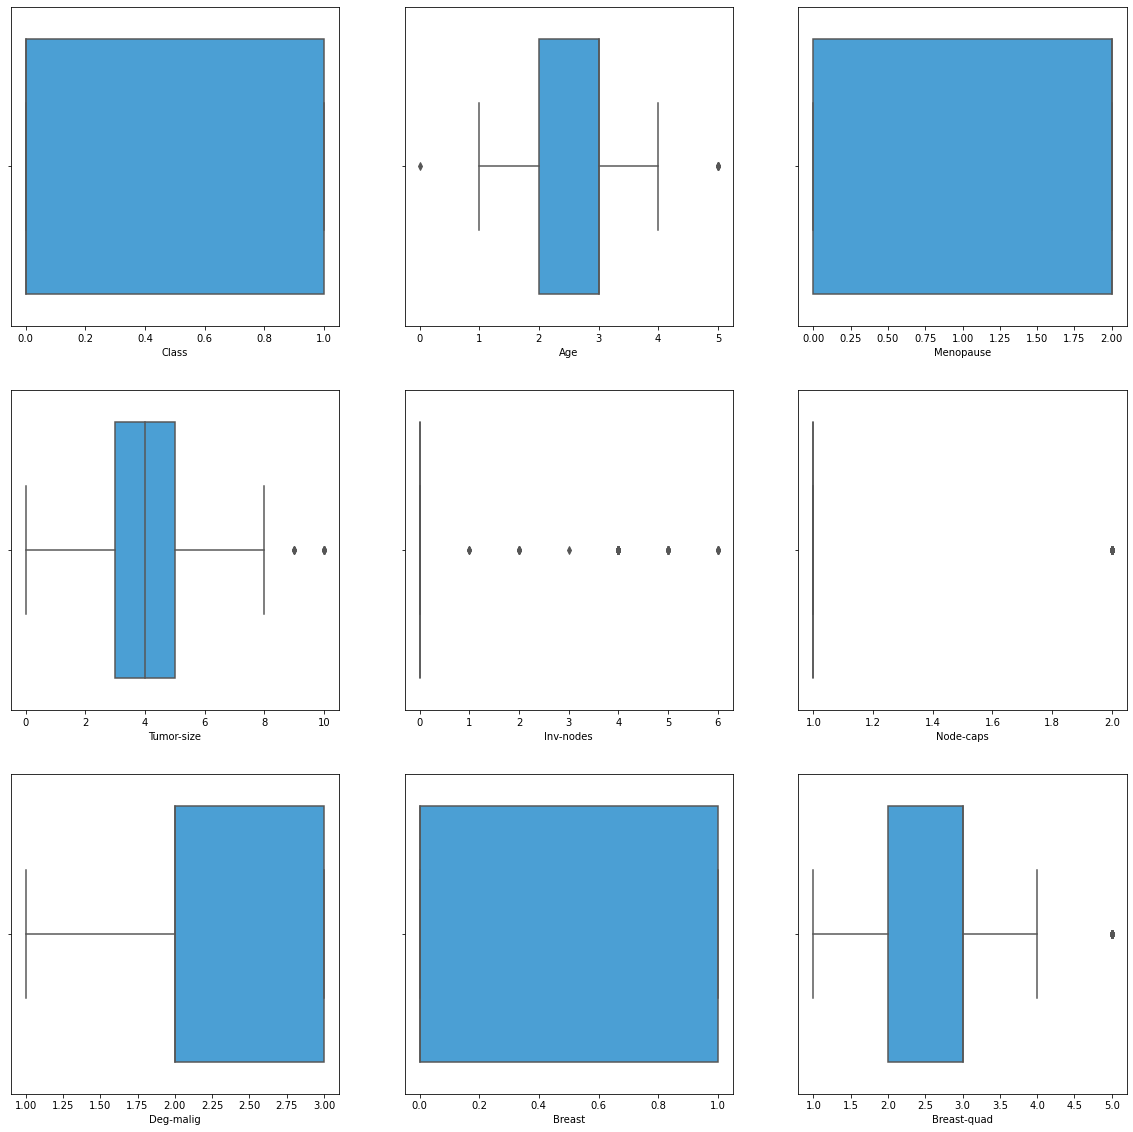

In [30]:
fig=plt.figure(figsize=(20,20))
features = ['Class', 'Age', 'Menopause', 'Tumor-size', 'Inv-nodes', 'Node-caps', 'Deg-malig','Breast', 'Breast-quad',]
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x=i[1],data=df_train,color="#34a4eb")
plt.savefig('Graph3.png')
plt.show()

There are outliers in the data but we aren't imputing them as they may be critical for prediction 

### plotting barplots wrt to the target variable

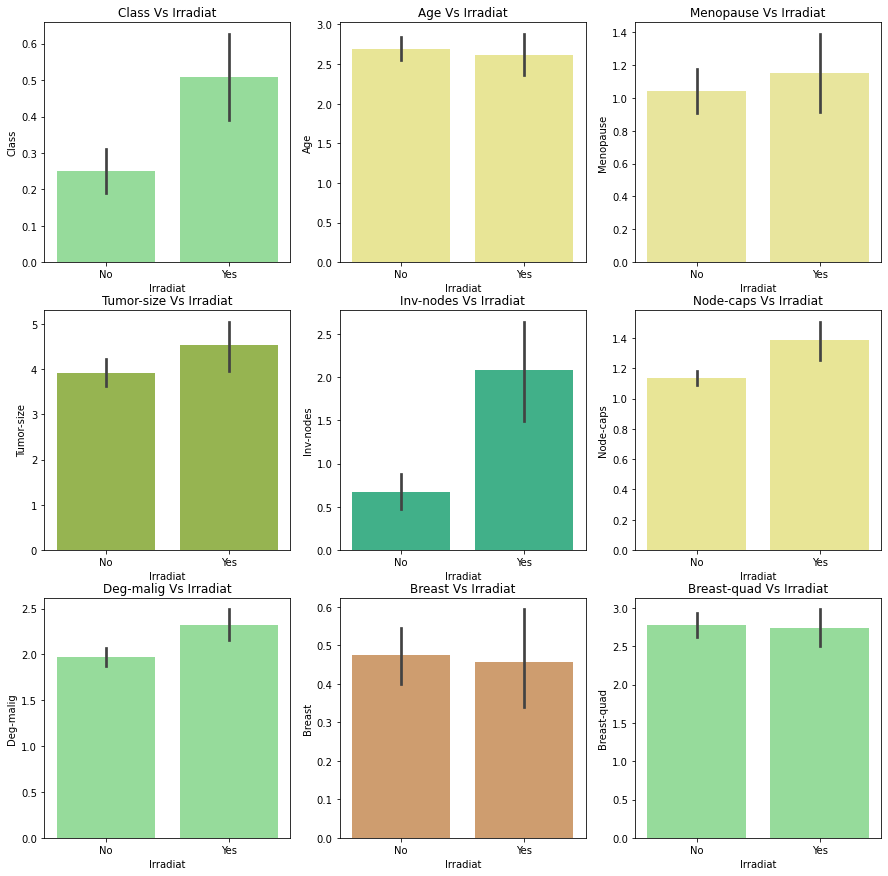

In [31]:
fig=plt.figure(figsize = [15,15])
plt.subplot(3,3,1)
sns.barplot(data = df_train, x = "Irradiat",y = "Class",color="#8ae691")
plt.title("Class Vs Irradiat")
positions = (0, 1)
labels = ('No','Yes')
plt.xticks(positions, labels)
plt.subplot(3,3,2)
sns.barplot(data = df_train, x = "Irradiat",y = "Age",color="#f5f189")
plt.title("Age Vs Irradiat")
positions = (0, 1)
labels = ('No','Yes')
plt.xticks(positions, labels)
plt.subplot(3,3,3)
sns.barplot(data = df_train, x = "Irradiat",y = "Menopause",color="#f5f190")
plt.title("Menopause Vs Irradiat")
positions = (0, 1)
labels = ('No','Yes')
plt.xticks(positions, labels)
plt.subplot(3,3,4)
sns.barplot(data = df_train, x = "Irradiat",y = "Tumor-size",color="#9dc441")
plt.title("Tumor-size Vs Irradiat")
positions = (0, 1)
labels = ('No','Yes')
plt.xticks(positions, labels)
plt.subplot(3,3,5)
sns.barplot(data = df_train, x = "Irradiat",y = "Inv-nodes",color="#2fc28e")
plt.title("Inv-nodes Vs Irradiat")
positions = (0, 1)
labels = ('No','Yes')
plt.xticks(positions, labels)
plt.subplot(3,3,6)
sns.barplot(data = df_train, x = "Irradiat",y = "Node-caps",color="#f5f189")
plt.title("Node-caps Vs Irradiat")
positions = (0, 1)
labels = ('No','Yes')
plt.xticks(positions, labels)
plt.subplot(3,3,7)
sns.barplot(data = df_train, x = "Irradiat",y = "Deg-malig",color="#8ae691")
plt.title("Deg-malig Vs Irradiat")
positions = (0, 1)
labels = ('No','Yes')
plt.xticks(positions, labels)
plt.subplot(3,3,8)
sns.barplot(data = df_train, x = "Irradiat",y = "Breast",color="#de9d5f")
plt.title("Breast Vs Irradiat")
positions = (0, 1)
labels = ('No','Yes')
plt.xticks(positions, labels)
plt.subplot(3,3,9)
sns.barplot(data = df_train, x = "Irradiat",y = "Breast-quad",color="#8ae691")
plt.title("Breast-quad Vs Irradiat")
positions = (0, 1)
labels = ('No','Yes')
plt.xticks(positions, labels)
plt.savefig('Graph4.png')
plt.show()

### Plotting of Categorical plots wrt to the Target Variable

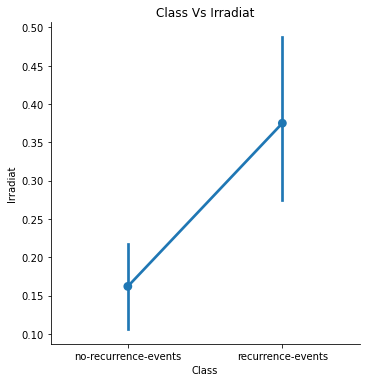

In [32]:
fig=sns.catplot(data = df_train, y = "Irradiat",x = "Class",kind='point')
plt.title("Class Vs Irradiat")
positions = (0, 1)
labels = ('no-recurrence-events','recurrence-events')
plt.xticks(positions, labels)
plt.savefig('Graph5.png')
plt.show()

Observation: 
    Patients with No Recurring Events have less chances of being diagnosed with breast cancer

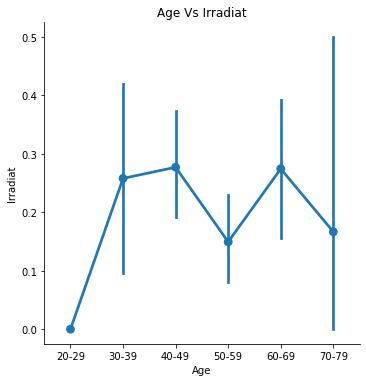

In [33]:
fig=sns.catplot(data = df_train, y = "Irradiat",x = "Age",kind='point')
plt.title("Age Vs Irradiat")
positions = (0, 1, 2, 3, 4, 5)
labels = ('20-29','30-39','40-49','50-59','60-69','70-79')
plt.xticks(positions, labels)
plt.savefig('Graph6.png')
plt.show()

Observation: 
    Patients in the age group of 40-49, 60-69 followed by 30-39  have more chances of being diagnosed with breast cancer

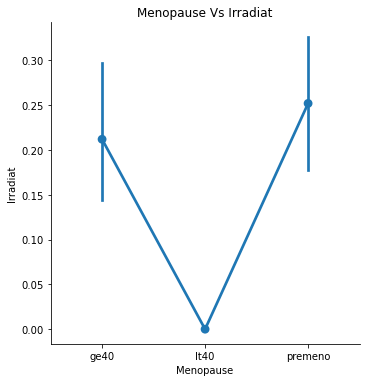

In [34]:
fig=sns.catplot(data = df_train, y = "Irradiat",x = "Menopause",kind='point')
plt.title("Menopause Vs Irradiat")
positions = (0, 1,2)
labels = ('ge40','lt40','premeno')
plt.xticks(positions, labels)
plt.savefig('Graph7.png')
plt.show()

Observation: 
    It is evident that patients who are in their premenopause and gestational40 are having more chances of being diagnosed with breast cancer

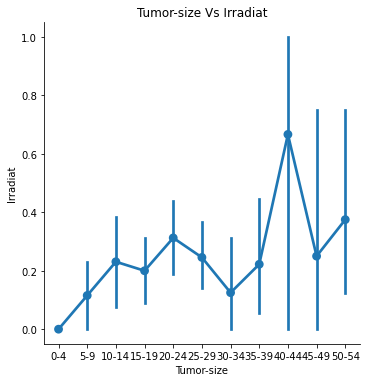

In [35]:
fig=sns.catplot(data = df_train, y = "Irradiat",x = "Tumor-size",kind='point')
plt.title("Tumor-size Vs Irradiat")
positions = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
labels = ('0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44','45-49', '50-54', '55-59')
plt.xticks(positions, labels)
plt.savefig('Graph8.png')
plt.show()

Observation: 
    It is evident that patients with tumour size 40-44 are having more chances of being diagnosed with breast cancer and undergo therapy

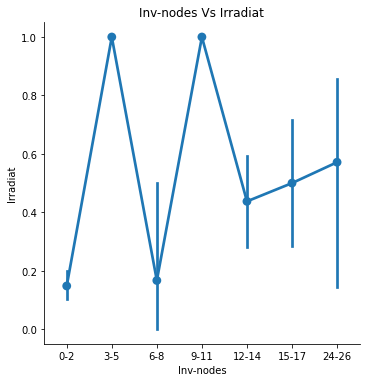

In [36]:
fig=sns.catplot(data = df_train, y = "Irradiat",x = "Inv-nodes",kind='point')
plt.title("Inv-nodes Vs Irradiat")
positions = (0, 1, 2, 3, 4, 5, 6)
labels = ('0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '24-26')
plt.xticks(positions, labels)
plt.savefig('Graph9.png')
plt.show()

Observation: 
    Patients with Lymph Nodes of 3-5 and 9-11 have more chances of being diagnosed with breast cancer and undergo therapy

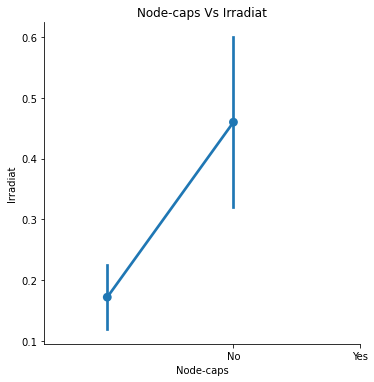

In [37]:
fig=sns.catplot(data = df_train, y = "Irradiat",x = "Node-caps",kind='point')
plt.title("Node-caps Vs Irradiat")
positions = (1, 2)
labels = ('No','Yes')
plt.xticks(positions, labels)
plt.savefig('Graph10.png')
plt.show()

Observation: 
    Patients who have undergone capping of nodes have more chances of being diagnosed with breast cancer and undergo therapy

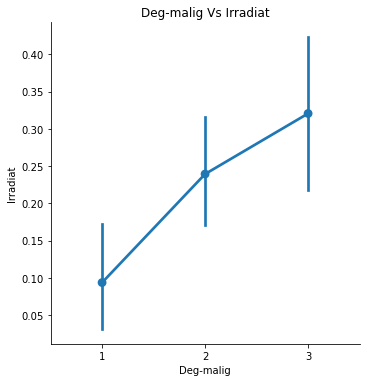

In [38]:
fig=sns.catplot(data = df_train, y = "Irradiat",x = "Deg-malig",kind='point')
plt.title("Deg-malig Vs Irradiat")
plt.savefig('Graph11.png')
plt.show()

Observation: 
    Patients with degree of malignancy of 3 have more chances of being diagnosed with breast cancer

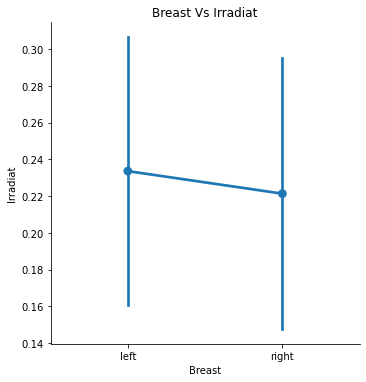

In [39]:
fig=sns.catplot(data = df_train, y = "Irradiat",x = "Breast",kind='point')
plt.title("Breast Vs Irradiat")
positions = (0, 1)
labels = ('left', 'right')
plt.xticks(positions, labels)
plt.savefig('Graph12.png')
plt.show()

Observation: 
    the left breast have more chances of being diagnosed with breast cancer and undergo therapy

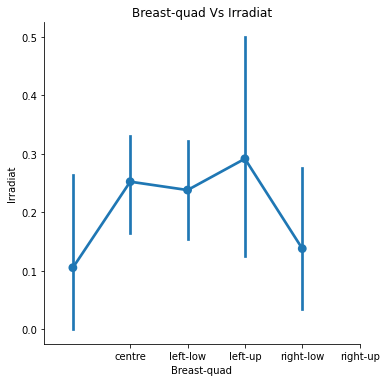

In [40]:
fig=sns.catplot(data = df_train, y = "Irradiat",x = "Breast-quad",kind='point')
plt.title("Breast-quad Vs Irradiat")
positions = (1, 2, 3, 4, 5)
labels = ('centre', 'left-low', 'left-up', 'right-low', 'right-up')
plt.xticks(positions, labels)
plt.savefig('Graph13.png')
plt.show()

Observation: 
    the right-low breast quandrant is having more chances of being diagnosed with breast cancer and undergo therapy

#### Data set divided into two sets

In [41]:
#Target = 0
Irradiat0 = df_train[df_train['Irradiat'] == 0]
#Target=1
Irradiat1 = df_train[df_train['Irradiat'] == 1]

#### Ploting of the graph and identifying the dependency of the variables wrt to the target variable

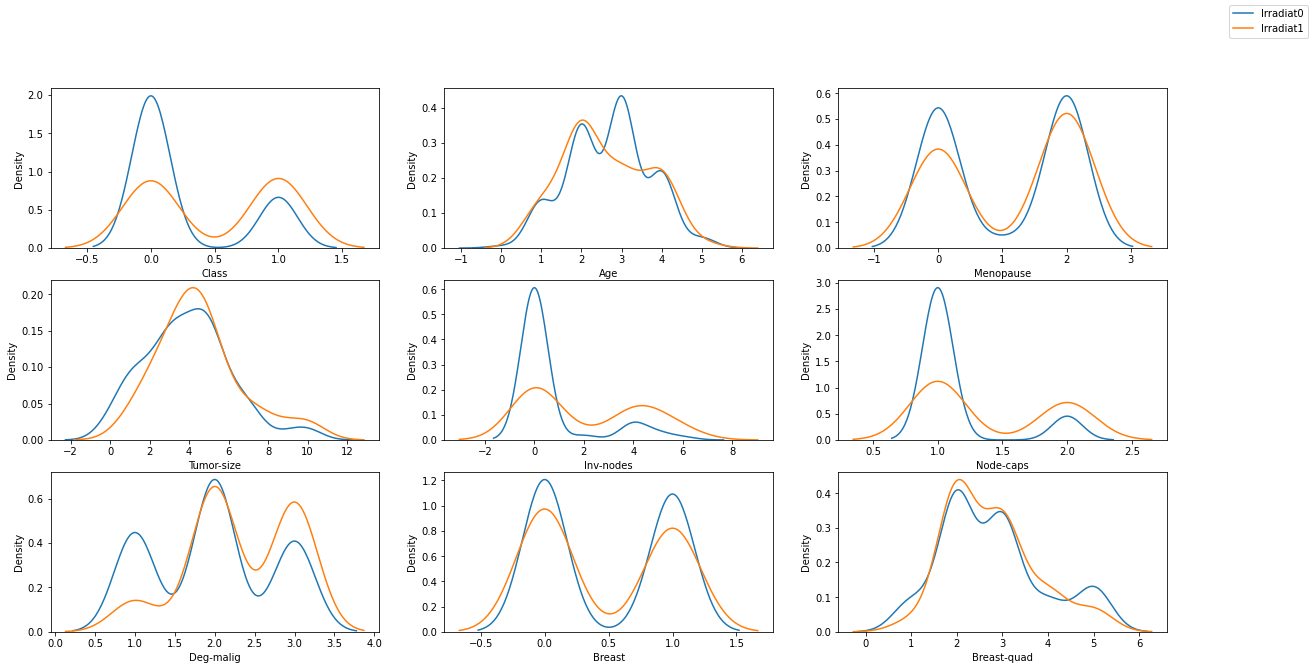

In [42]:
fig =plt.figure(figsize = [20,10])
plt.subplot(3,3,1)
sns.distplot(Irradiat0['Class'],label='Irradiat0',hist = False)# Target = 0
sns.distplot(Irradiat1['Class'],label='Irradiat1',hist = False)# Target = 1
plt.subplot(3,3,2)
sns.distplot(Irradiat0['Age'], label='Irradiat0', hist = False)# Target = 0
sns.distplot(Irradiat1['Age'], label='Irradiat1',hist = False)# Target = 1
plt.subplot(3,3,3)
sns.distplot(Irradiat0['Menopause'],  label='Irradiat0', hist = False)# Target = 0
sns.distplot(Irradiat1['Menopause'],label='Irradiat1',hist = False)# Target = 1
plt.subplot(3,3,4)
sns.distplot(Irradiat0['Tumor-size'], label='Irradiat0',hist = False)# Target = 0
sns.distplot(Irradiat1['Tumor-size'], label='Irradiat1',hist = False)# Target = 1
plt.subplot(3,3,5)
sns.distplot(Irradiat0['Inv-nodes'], label='Irradiat0',hist = False)# Target = 0
sns.distplot(Irradiat1['Inv-nodes'], label='Irradiat1',hist = False)# Target = 1
plt.subplot(3,3,6)
sns.distplot(Irradiat0['Node-caps'], label='Irradiat0',hist = False)# Target = 0
sns.distplot(Irradiat1['Node-caps'], label='Irradiat1',hist = False)# Target = 1
plt.subplot(3,3,7)
sns.distplot(Irradiat0['Deg-malig'], label='Irradiat0', hist = False)# Target = 0
sns.distplot(Irradiat1['Deg-malig'], label='Irradiat1',hist = False)# Target = 1
plt.subplot(3,3,8)
sns.distplot(Irradiat0['Breast'], label='Irradiat0',hist = False)# Target = 0
sns.distplot(Irradiat1['Breast'], label='Irradiat1',hist = False)# Target = 1
plt.subplot(3,3,9)
sns.distplot(Irradiat0['Breast-quad'], label='Irradiat0',hist = False)# Target = 0
sns.distplot(Irradiat1['Breast-quad'], label='Irradiat1',hist = False)# Target = 1
fig.legend(labels=['Irradiat0','Irradiat1'])
plt.savefig('Graph14.png')
plt.show()

### Bivariate Analysis

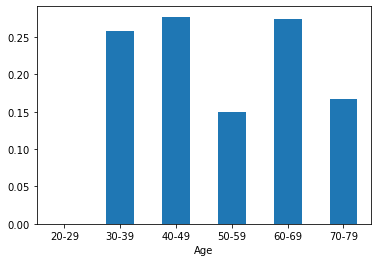

In [43]:
fig=df_train.groupby(['Age'])['Irradiat'].mean().plot.bar()
positions = (0, 1, 2, 3, 4, 5)
labels = ('20-29','30-39','40-49','50-59','60-69','70-79')
plt.xticks(positions, labels,rotation='horizontal')
plt.savefig('Graph15.png')
plt.show()

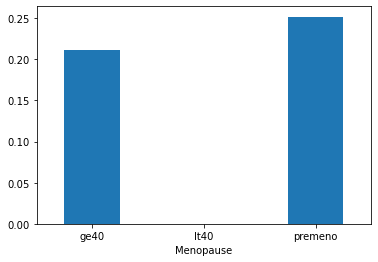

In [44]:
fig=df_train.groupby(['Menopause'])['Irradiat'].mean().plot.bar()
positions = (0, 1, 2)
labels = ('ge40','lt40','premeno')
plt.xticks(positions, labels,rotation='horizontal')
plt.savefig('Graph16.png')
plt.show()

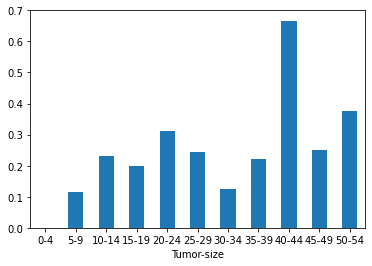

In [45]:
fig= df_train.groupby(['Tumor-size'])['Irradiat'].mean().plot.bar()
positions = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
labels = ('0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44','45-49', '50-54', '55-59')
plt.xticks(positions, labels,rotation='horizontal')
plt.savefig('Graph17.png')
plt.show()

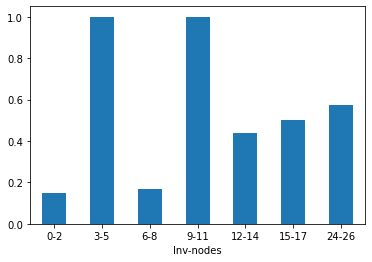

In [46]:
fig=df_train.groupby(['Inv-nodes'])['Irradiat'].mean().plot.bar()
positions = (0, 1, 2, 3, 4, 5, 6)
labels = ('0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '24-26')
plt.xticks(positions, labels,rotation='horizontal')
plt.savefig('Graph18.png')
plt.show()

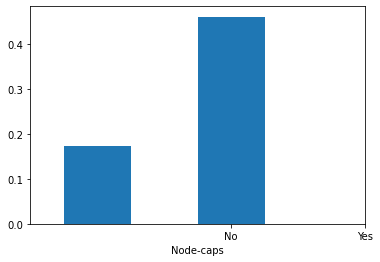

In [47]:
fig=df_train.groupby(['Node-caps'])['Irradiat'].mean().plot.bar()
positions =(1, 2)
labels =('No','Yes')
plt.xticks(positions, labels,rotation='horizontal')
plt.savefig('Graph19.png')
plt.show()

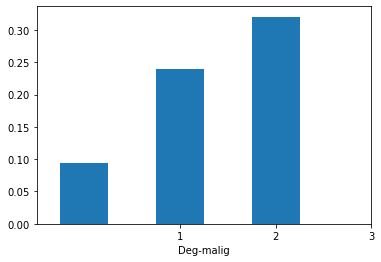

In [48]:
fig=df_train.groupby(['Deg-malig'])['Irradiat'].mean().plot.bar()
positions = (1, 2, 3)
plt.xticks(positions,rotation='horizontal')
plt.savefig('Graph20.png')
plt.show()

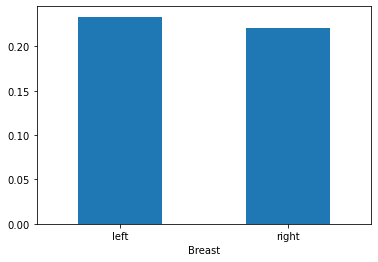

In [49]:
fig=df_train.groupby(['Breast'])['Irradiat'].mean().plot.bar()
positions = (0, 1)
labels = ('left', 'right')
plt.xticks(positions, labels,rotation='horizontal')
plt.savefig('Graph21.png')
plt.show()

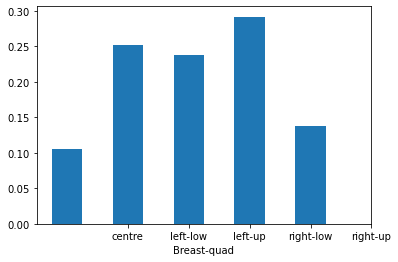

In [50]:
fig=df_train.groupby(['Breast-quad'])['Irradiat'].mean().plot.bar()
positions = (1, 2, 3, 4, 5)
labels = ('centre', 'left-low', 'left-up', 'right-low', 'right-up')
plt.xticks(positions,labels,rotation='horizontal')
plt.savefig('Graph22.png')
plt.show()

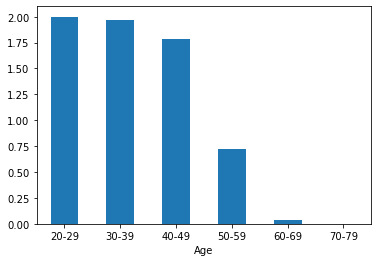

In [51]:
fig=df_train.groupby(['Age'])['Menopause'].mean().plot.bar()
positions = (0, 1, 2, 3, 4, 5)
labels = ('20-29','30-39','40-49','50-59','60-69','70-79')
plt.xticks(positions, labels,rotation='horizontal')
plt.savefig('Graph23.png')
plt.show()

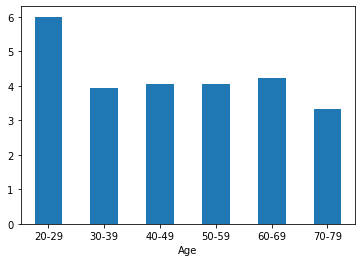

In [52]:
fig=df_train.groupby(['Age'])['Tumor-size'].mean().plot.bar()
positions = (0, 1, 2, 3, 4, 5)
labels = ('20-29','30-39','40-49','50-59','60-69','70-79')
plt.xticks(positions, labels,rotation='horizontal')
plt.savefig('Graph24.png')
plt.show()

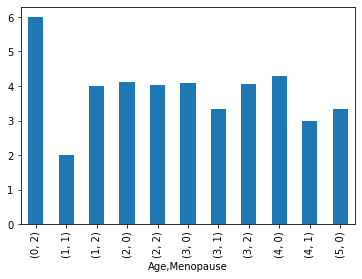

In [53]:
fig=df_train.groupby(['Age','Menopause'])['Tumor-size'].mean().plot.bar()
plt.savefig('Graph25.png')
plt.show()

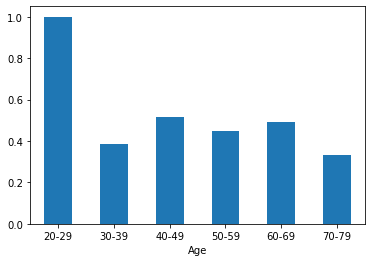

In [54]:
fig=df_train.groupby(['Age',])['Breast'].mean().plot.bar()
positions = (0, 1, 2, 3, 4, 5)
labels = ('20-29','30-39','40-49','50-59','60-69','70-79')
plt.xticks(positions, labels,rotation='horizontal')
plt.savefig('Graph26.png')
plt.show()

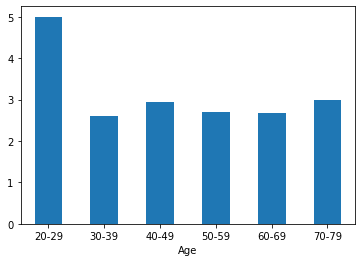

In [55]:
fig=df_train.groupby(['Age',])['Breast-quad'].mean().plot.bar()
positions = (0, 1, 2, 3, 4, 5)
labels = ('20-29','30-39','40-49','50-59','60-69','70-79')
plt.xticks(positions, labels,rotation='horizontal')
plt.savefig('Graph27.png')
plt.show()

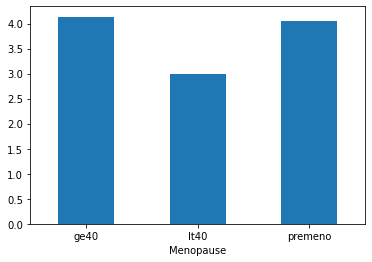

In [56]:
fig=df_train.groupby(['Menopause',])['Tumor-size'].mean().plot.bar()
positions = (0, 1, 2)
labels = ('ge40','lt40','premeno')
plt.xticks(positions, labels,rotation='horizontal')
plt.savefig('Graph28.png')
plt.show()

### Descriptive Statistics of the dataset

In [57]:
df_train.describe()

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
count,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,0.308880,2.671815,1.065637,4.061776,0.996139,1.193050,2.054054,0.471042,2.772201,0.227799
std,0.462926,1.009844,0.988077,2.182570,1.860437,0.395456,0.739902,0.500127,1.088274,0.420224
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,1.000000,2.000000,0.000000,2.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,2.000000,0.000000,3.000000,0.000000
75%,1.000000,3.000000,2.000000,5.000000,0.000000,1.000000,3.000000,1.000000,3.000000,0.000000
max,1.000000,5.000000,2.000000,10.000000,6.000000,2.000000,3.000000,1.000000,5.000000,1.000000


### Analyzing Descriptive Statistics of the dataset for outliers

In [58]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
df_train.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
count,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,0.308880,2.671815,1.065637,4.061776,0.996139,1.193050,2.054054,0.471042,2.772201,0.227799
std,0.462926,1.009844,0.988077,2.182570,1.860437,0.395456,0.739902,0.500127,1.088274,0.420224
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,1.000000,2.000000,0.000000,2.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,2.000000,0.000000,3.000000,0.000000
75%,1.000000,3.000000,2.000000,5.000000,0.000000,1.000000,3.000000,1.000000,3.000000,0.000000
90%,1.000000,4.000000,2.000000,7.000000,4.000000,2.000000,3.000000,1.000000,5.000000,1.000000
95%,1.000000,4.000000,2.000000,8.000000,5.000000,2.000000,3.000000,1.000000,5.000000,1.000000
99%,1.000000,5.000000,2.000000,10.000000,6.000000,2.000000,3.000000,1.000000,5.000000,1.000000


### Outlier Treatment

In [59]:
# def outlier_treatment(datacolumn):
#  sorted(datacolumn)
#  Q1,Q3 = np.percentile(datacolumn , [25,75])
#  IQR = Q3 - Q1
#  lower_range = Q1 - (1.5 * IQR)
#  upper_range = Q3 + (1.5 * IQR)
#  return lower_range,upper_range

In [60]:
# lowerbound,upperbound = outlier_treatment(df_train['Age'])
# print("lowerbound",lowerbound)
# print("*"*100)
# print("upperbound",upperbound)

In [61]:
# df_train[(df_train.Age < lower_range) | (df_train.Age > upper_range)]
# df_train.drop(df_train[ (df_train.Age > upperbound) | (df_train.Age < lowerbound) ].index , inplace=True)

### Ploting of the Heatmap for identifying the correlating variables

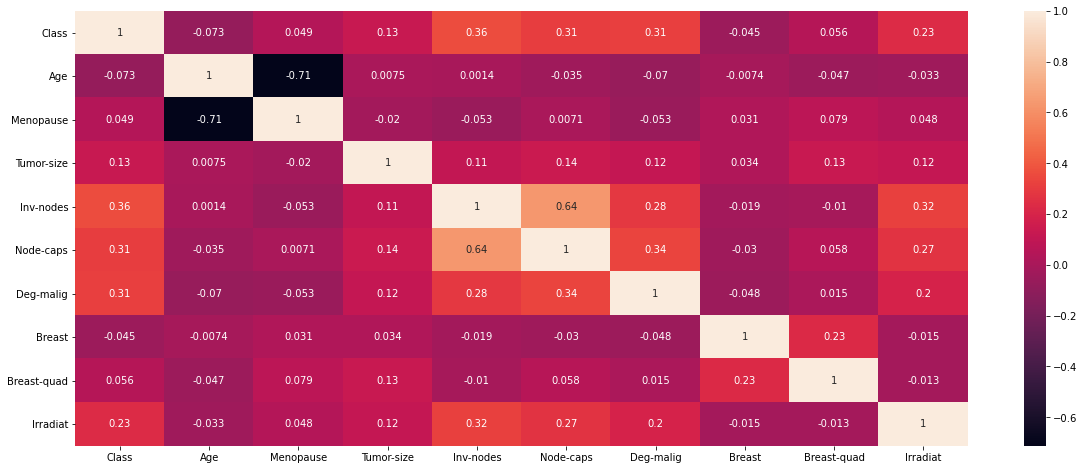

In [62]:
fig=plt.figure(figsize = (20,8))        # Size of the figure
sns.heatmap(df_train.corr(),annot = True)
plt.savefig('Graph29.png')
plt.show()

### Correlation Matrix

In [63]:
correlation = df_train.corr()
correlation

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
Class,1.000000,-0.072507,0.048716,0.126817,0.361424,0.308185,0.313179,-0.044923,0.055578,0.234632
Age,-0.072507,1.000000,-0.712499,0.007476,0.001386,-0.034851,-0.069540,-0.007378,-0.047129,-0.033220
Menopause,0.048716,-0.712499,1.000000,-0.019861,-0.052574,0.007124,-0.052587,0.031313,0.078841,0.047864
Tumor-size,0.126817,0.007476,-0.019861,1.000000,0.106014,0.138813,0.115531,0.033603,0.133230,0.115603
Inv-nodes,0.361424,0.001386,-0.052574,0.106014,1.000000,0.638476,0.284541,-0.018866,-0.010008,0.318425
Node-caps,0.308185,-0.034851,0.007124,0.138813,0.638476,1.000000,0.335106,-0.030418,0.057550,0.270791
Deg-malig,0.313179,-0.069540,-0.052587,0.115531,0.284541,0.335106,1.000000,-0.048125,0.015351,0.197097
Breast,-0.044923,-0.007378,0.031313,0.033603,-0.018866,-0.030418,-0.048125,1.000000,0.226398,-0.014597
Breast-quad,0.055578,-0.047129,0.078841,0.133230,-0.010008,0.057550,0.015351,0.226398,1.000000,-0.013220
Irradiat,0.234632,-0.033220,0.047864,0.115603,0.318425,0.270791,0.197097,-0.014597,-0.013220,1.000000


In [64]:
### Determining the Correlated Variables

In [65]:
threshold=0.7
correlated_features=[]
for i in range(len(correlation.columns)):
    for j in range(i):
        if abs(correlation.iloc[i, j]) > threshold:
            colname = correlation.columns[i]
            correlated_features.append(colname)

In [66]:
print(correlated_features)

['Menopause']


In [67]:
df_train.pivot_table(df_train, index=["Irradiat"])

,Age,Breast,Breast-quad,Class,Deg-malig,Inv-nodes,Menopause,Node-caps,Tumor-size
Irradiat,,,,,,,,,
0,2.690000,0.475000,2.780000,0.250000,1.975000,0.675000,1.040000,1.135000,3.925000
1,2.610169,0.457627,2.745763,0.508475,2.322034,2.084746,1.152542,1.389831,4.525424


## Performing Chi-Square Test

In [68]:
df_train.columns

Index(['Class', 'Age', 'Menopause', 'Tumor-size', 'Inv-nodes', 'Node-caps', 'Deg-malig', 'Breast', 'Breast-quad', 'Irradiat'], dtype='object')

In [69]:
# For feature selection
from sklearn.feature_selection import mutual_info_classif
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [70]:
chi_df=df_train[['Class', 'Age', 'Menopause', 'Tumor-size', 'Inv-nodes', 'Node-caps', 'Deg-malig', 'Breast', 'Breast-quad','Irradiat']]
X_chi=chi_df.drop('Irradiat',axis=1)
y_chi=chi_df['Irradiat']
f,p=chi2(X_chi,y_chi)

The smaller the p-value, the better a particular feature is in this test.
Also, The bigger the f-value, the better a feature is,

In [71]:
chi_p = pd.Series(p)
chi_p.index = X_chi.columns
chi_p.sort_values(ascending=False)

Breast-quad    8.896111e-01
Breast         8.643362e-01
Age            7.416623e-01
Menopause      4.618083e-01
Node-caps      1.153128e-01
Deg-malig      1.021759e-01
Tumor-size     4.433577e-02
Class          1.694313e-03
Inv-nodes      1.514395e-21
dtype: float64

So after all the tests and some trial and error, I decided to choose the following features for my model.

In [72]:
# X = df_train[['Breast-quad','Breast','Age','Menopause']]
# y=df_train['Irradiat']

## Performing Pearson's Regression Test

In this, we find the correlation coefficient between the features and the target variable.<br> 
After that we find the p-value and check it against alpha (Significance Level) to see if a feature will be significant to our model or not. 

In [73]:
for i in df_train.columns:
    r,p = stats.pearsonr(df_train['Irradiat'],df_train[i])
    if p<0.01:
        print(f'{i} is significant')
    else:
        print(f'{i} is not significant')

Class is significant
Age is not significant
Menopause is not significant
Tumor-size is not significant
Inv-nodes is significant
Node-caps is significant
Deg-malig is significant
Breast is not significant
Breast-quad is not significant
Irradiat is significant


## Using mutual_info_classif 

Note: We can only use this if we're facing a classification problem.<br> For regression problems, we can use the mutual_info_regression function from the feature_selection library.

In [74]:
X=df_train.drop('Irradiat',axis=1)
y=df_train['Irradiat']

In [75]:
model = mutual_info_classif(X,y)
model_series=pd.Series(model)
model_series.index= X.columns
model_series.sort_values(ascending=False)

Class          0.041865
Inv-nodes      0.031711
Deg-malig      0.025435
Breast-quad    0.022633
Node-caps      0.018995
Tumor-size     0.014579
Age            0.013015
Breast         0.000000
Menopause      0.000000
dtype: float64

With this, we can use the top 8 features

In [76]:
top_8_cols = SelectKBest(mutual_info_classif,k=8)
top_8_cols.fit(X,y)
X.columns[top_8_cols.get_support()]

Index(['Age', 'Menopause', 'Tumor-size', 'Inv-nodes', 'Node-caps', 'Deg-malig', 'Breast', 'Breast-quad'], dtype='object')

we are not dropping any of the columns in the model building 

### Model Building

In [77]:
#### Importing necessary libraries for the model building 

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [79]:
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [80]:
# change Irradiat to numeric
df_train['Irradiat'] = pd.to_numeric(df_train['Irradiat'])
df_test['Irradiat'] = pd.to_numeric(df_test['Irradiat'])

In [81]:
# divide data into train and test
np.random.seed(0)
X = df_train.drop(columns=['Irradiat'], axis = 1)
y = df_train.Irradiat
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [82]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((207, 9), (207,), (52, 9), (52,))

### Balance data set by oversampling

In [83]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train,y_train = sm.fit_resample(X_train,y_train.ravel())

In [84]:
print("X_train Dataframe Shape {}".format(X_train.shape))
print("y_train Dataframe Shape {}".format(y_train.shape))

data_imbalance = (y_train != 0).sum()/(y_train == 0).sum()
print("Imbalance in Train Data: {}".format(data_imbalance))

X_train Dataframe Shape (320, 9)
y_train Dataframe Shape (320,)
Imbalance in Train Data: 1.0


### Feature Scaling

In [85]:
scaler = StandardScaler()

In [86]:
X_train.dtypes

Class           int8
Age             int8
Menopause       int8
Tumor-size      int8
Inv-nodes       int8
Node-caps       int8
Deg-malig      int64
Breast          int8
Breast-quad     int8
dtype: object

In [87]:
num_cols=X_train.select_dtypes(include=['float64', 'int8']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad
0,-0.698836,0.432801,-1.058968,0.011665,-0.636145,-0.538816,1,-0.75918,1.407158
1,1.430950,0.432801,-1.058968,0.478266,-0.636145,-0.538816,3,-0.75918,-0.625756
2,1.430950,-1.618997,1.007311,0.944867,-0.636145,-0.538816,3,-0.75918,-0.625756
3,1.430950,1.458701,-1.058968,1.411469,1.369435,1.855921,3,1.31721,-0.625756
4,-0.698836,0.432801,1.007311,0.011665,-0.636145,-0.538816,2,-0.75918,-0.625756


In [88]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

**LOGISTIC REGRESSION**

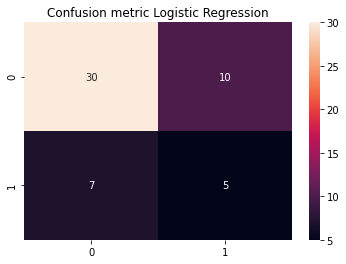

Accuracy score for Training Dataset =  0.66875
Accuracy score for Testing Dataset =  0.6730769230769231
Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.75      0.78        40
           1       0.33      0.42      0.37        12

    accuracy                           0.67        52
   macro avg       0.57      0.58      0.57        52
weighted avg       0.70      0.67      0.68        52



In [89]:
#training model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 10000)
lr.fit(X_train,y_train)


from sklearn.metrics import confusion_matrix,classification_report

# prediction for Training data
train_pred_sm = lr.predict(X_train)

# prediction for Testing data
y_pred = lr.predict(X_test)
#getting confusion matrix
cm = confusion_matrix(y_test,y_pred)
y_prob_lr = lr.predict_proba(X_test)[:, 1]


fig=sns.heatmap(cm, annot = True)
plt.title("Confusion metric Logistic Regression")
plt.savefig('Graph30.png')
plt.show()

#checking accuracy
from sklearn.metrics import accuracy_score
lra_train = accuracy_score(y_train,train_pred_sm)
lra_test = accuracy_score(y_test,y_pred)
print('Accuracy score for Training Dataset = ', accuracy_score(y_train,train_pred_sm))
print('Accuracy score for Testing Dataset = ', accuracy_score(y_test,y_pred))
print("Classification Report \n",classification_report(y_test,y_pred))

#### Probability Distribution

In [90]:
probability_lr=pd.DataFrame(lr.predict_proba(X_test),columns=["No Treament","Treament"])

In [91]:
probability_lr.head()

,No Treament,Treament
0,0.663457,0.336543
1,0.368603,0.631397
2,0.622869,0.377131
3,0.901444,0.098556
4,0.369276,0.630724


**K NEAREST NEIGHBOUR**

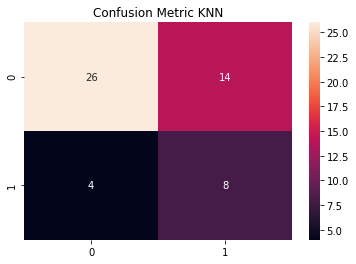

Accuracy score for Training Dataset =  0.828125
Accuracy score for Testing Dataset =  0.6538461538461539
Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.65      0.74        40
           1       0.36      0.67      0.47        12

    accuracy                           0.65        52
   macro avg       0.62      0.66      0.61        52
weighted avg       0.75      0.65      0.68        52



<Figure size 432x288 with 0 Axes>

In [92]:
#training model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p = 2)
knn.fit(X_train,y_train)

# prediction for Training data
train_pred_sm = knn.predict(X_train)

# prediction for Testing data
y_pred = knn.predict(X_test)
#getting confusion matrix
cm = confusion_matrix(y_test,y_pred)
y_prob_knn = knn.predict_proba(X_test)[:, 1]

fig=sns.heatmap(cm, annot = True)
plt.title("Confusion Metric KNN")
plt.show()
plt.savefig('Graph31.png')

#checking accuracy
from sklearn.metrics import accuracy_score
knna_train = accuracy_score(y_train,train_pred_sm)
knna_test = accuracy_score(y_test,y_pred)
print('Accuracy score for Training Dataset = ', accuracy_score(y_train,train_pred_sm))
print('Accuracy score for Testing Dataset = ', accuracy_score(y_test,y_pred))
print("Classification Report \n",classification_report(y_test,y_pred))

#### Probability Distribution

In [93]:
probability_knn=pd.DataFrame(knn.predict_proba(X_test),columns=["No Treament","Treament"])

In [94]:
probability_knn.head()

,No Treament,Treament
0,0.0,1.0
1,0.2,0.8
2,0.8,0.2
3,0.4,0.6
4,0.2,0.8


**DECISION TREE**

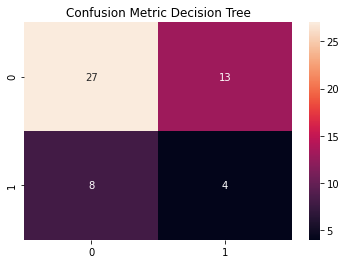

Accuracy score for Training Dataset =  0.9875
Accuracy score for Testing Dataset =  0.5961538461538461
Classification Report 
               precision    recall  f1-score   support

           0       0.77      0.68      0.72        40
           1       0.24      0.33      0.28        12

    accuracy                           0.60        52
   macro avg       0.50      0.50      0.50        52
weighted avg       0.65      0.60      0.62        52

ROC Curve 0.49062500000000003


In [95]:
#training model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train,y_train)

# prediction for Training data
train_pred_sm = dt.predict(X_train)

# prediction for Testing data
y_pred = dt.predict(X_test)
#getting confusion matrix
cm = confusion_matrix(y_test,y_pred)
y_prob_dt = dt.predict_proba(X_test)[:, 1]


fig=sns.heatmap(cm, annot = True)
plt.title("Confusion Metric Decision Tree")
plt.savefig('Graph32.png')
plt.show()

#checking accuracy
from sklearn.metrics import accuracy_score
dta_train = accuracy_score(y_train,train_pred_sm)
dta_test = accuracy_score(y_test,y_pred)
print('Accuracy score for Training Dataset = ', accuracy_score(y_train,train_pred_sm))
print('Accuracy score for Testing Dataset = ', accuracy_score(y_test,y_pred))
print("Classification Report \n",classification_report(y_test,y_pred))

print("ROC Curve",roc_auc_score(y_test, y_prob_dt))


#### Probability Distribution

In [96]:
probability_dt=pd.DataFrame(dt.predict_proba(X_test),columns=["No Treament","Treament"])

In [97]:
probability_dt.head()

,No Treament,Treament
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


**RANDOM FOREST**

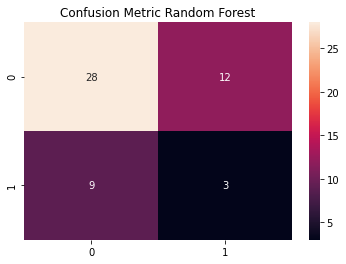

Accuracy score for Training Dataset =  0.9875
Accuracy score for Testing Dataset =  0.5961538461538461
Classification Report 
               precision    recall  f1-score   support

           0       0.76      0.70      0.73        40
           1       0.20      0.25      0.22        12

    accuracy                           0.60        52
   macro avg       0.48      0.47      0.47        52
weighted avg       0.63      0.60      0.61        52



In [98]:
#training model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 60, criterion = 'entropy',random_state = 0)
rf.fit(X_train,y_train)

# prediction for Training data
train_pred_sm = rf.predict(X_train)

# prediction for Testing data
y_pred = rf.predict(X_test)
#getting confusion matrix
cm = confusion_matrix(y_test,y_pred)
y_prob_rf = rf.predict_proba(X_test)[:, 1]


fig=sns.heatmap(cm, annot = True)
plt.title("Confusion Metric Random Forest")
plt.savefig('Graph33.png')
plt.show()

#checking accuracy
from sklearn.metrics import accuracy_score
rfa_train = accuracy_score(y_train,train_pred_sm)
rfa_test = accuracy_score(y_test,y_pred)
print('Accuracy score for Training Dataset = ', accuracy_score(y_train,train_pred_sm))
print('Accuracy score for Testing Dataset = ', accuracy_score(y_test,y_pred))
print("Classification Report \n",classification_report(y_test,y_pred))


#### Probability Distribution

In [99]:
probability_rf=pd.DataFrame(rf.predict_proba(X_test),columns=["No Treament","Treament"])

In [100]:
probability_rf.head()

,No Treament,Treament
0,0.150000,0.850000
1,0.583333,0.416667
2,0.750000,0.250000
3,0.850000,0.150000
4,0.683333,0.316667


#### Accuracy Score for the Models

In [101]:
models_comparision=pd.DataFrame({'Model':['Logistic Regression','K-Nearest Neighbour','Decision Tree','Random Forest'],
                                 'Accuracy_train':[lra_train,knna_train,dta_train,rfa_train],
                                'Accuracy_test':[lra_test,knna_test,dta_test,rfa_test]})
models_comparision.sort_values(by='Accuracy_test',ascending= False)

,Model,Accuracy_train,Accuracy_test
0,Logistic Regression,0.668750,0.673077
1,K-Nearest Neighbour,0.828125,0.653846
2,Decision Tree,0.987500,0.596154
3,Random Forest,0.987500,0.596154


### Plotting of the Acccuracy Score

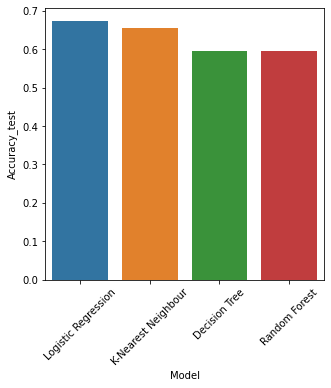

In [102]:
fig=plt.figure(figsize=(5,5))
sns.barplot(x=models_comparision.Model,y=models_comparision.Accuracy_test)
plt.xticks(rotation=45) 
plt.savefig('Graph34.png')
plt.show()

### Tune KNeighborsClassifier (K-Nearest Neighbors or KNN) by hand

There's one main hyperparameter we can tune for the K-Nearest Neighbors (KNN) algorithm, and that is number of neighbours. The default is 5 (n_neigbors=5).

In [103]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [104]:
train_scores

[0.971875,
 0.878125,
 0.853125,
 0.846875,
 0.828125,
 0.83125,
 0.821875,
 0.825,
 0.784375,
 0.78125,
 0.74375,
 0.734375,
 0.746875,
 0.715625,
 0.709375,
 0.696875,
 0.6875,
 0.70625,
 0.678125,
 0.709375]

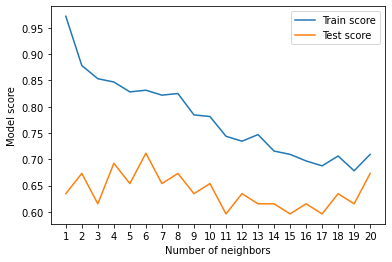

Maximum KNN score on the test data: 71.15%


In [105]:
fig=plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.savefig('Graph35.png')
plt.show()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Looking at the graph we are unable to get to a conclusion for the value of n 

Because of this, we'll discard KNN and focus on the others.

### Tuning models with with RandomizedSearchCV 

In [106]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

dt_grid = {"max_depth": [None, 3, 5, 10],
            "max_features": np.arange(2, 20, 2),
            "min_samples_leaf": np.arange(1, 20, 2),
            "criterion": ["gini", "entropy"]}

Now let's use RandomizedSearchCV to try and tune our LogisticRegression model.

We'll pass it the different hyperparameters from log_reg_grid as well as set n_iter = 20. 

This means, RandomizedSearchCV will try 20 different combinations of hyperparameters from log_reg_grid and save the best ones.

In [107]:
%%time
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model

rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Wall time: 1.62 s


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [108]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.03359818286283781}

In [109]:
rs_log_reg.score(X_test, y_test)

0.7115384615384616

Now we've tuned LogisticRegression using RandomizedSearchCV , we'll do the same for RandomForestClassifier.

In [110]:
%%time
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True,n_jobs=-1)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Wall time: 2min 38s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [111]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 910,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [112]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.6538461538461539

In [113]:
%%time
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for DecisionTreeClassifier
rs_dt = RandomizedSearchCV(DecisionTreeClassifier(),
                           param_distributions=dt_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True,n_jobs=-1)

# Fit random hyperparameter search model
rs_dt.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Wall time: 1.54 s


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 3, 5, 10],
                                        'max_features': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])},
                   verbose=True)

In [114]:
# Find the best parameters
rs_dt.best_params_

{'min_samples_leaf': 1,
 'max_features': 8,
 'max_depth': None,
 'criterion': 'entropy'}

In [115]:
# Evaluate the randomized search random forest model
rs_dt.score(X_test, y_test)

0.5192307692307693

### Tuning a model with  Grid Search CV

In [116]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [117]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.03359818286283781, 'solver': 'liblinear'}

In [118]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.7115384615384616

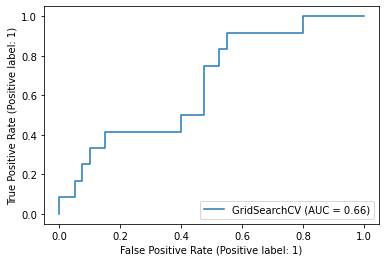

In [119]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
fig=plot_roc_curve(gs_log_reg, X_test, y_test);
plt.savefig('Graph36.png')
plt.show()

our model does far better than guessing which would be a line going from the bottom left corner to the top right corner, 
AUC = 0.5. But a perfect model would achieve an AUC score of 1.0, so there's still room for improvement.

In [120]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.03359818286283781, 'solver': 'liblinear'}

In [121]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.03359818286283781,
                         solver="liblinear")

In [122]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X_train,
                         y_train,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.625   , 0.609375, 0.765625, 0.578125, 0.5625  ])

In [123]:
cv_acc = np.mean(cv_acc)
cv_acc

0.628125

In [124]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X_train,
                                       y_train,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.6306355026355026

In [125]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X_train,
                                    y_train,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.61875

In [126]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X_train,
                                y_train,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.6207260266032737

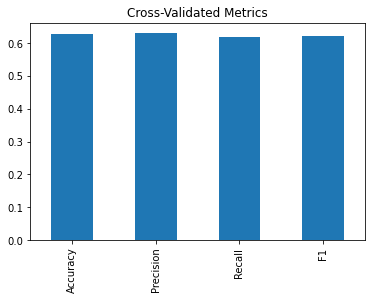

In [127]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
fig=cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);
plt.savefig('Graph36.png')
plt.show()

### Feature importance

In [128]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(X_train, y_train);

In [129]:
# Check coef_
clf.coef_

array([[ 0.15123518, -0.20744277, -0.0505709 ,  0.08350463,  0.31589156,
         0.10886425,  0.08002947, -0.23968762, -0.14509719]])

In [130]:
# Match features to columns
features_dict = dict(zip(df_train.columns, list(clf.coef_[0])))
features_dict

{'Class': 0.15123517967760125,
 'Age': -0.20744276770136671,
 'Menopause': -0.050570895469299035,
 'Tumor-size': 0.08350462993018495,
 'Inv-nodes': 0.3158915581582075,
 'Node-caps': 0.10886424573605546,
 'Deg-malig': 0.08002947180084133,
 'Breast': -0.23968761901921734,
 'Breast-quad': -0.1450971890578504}

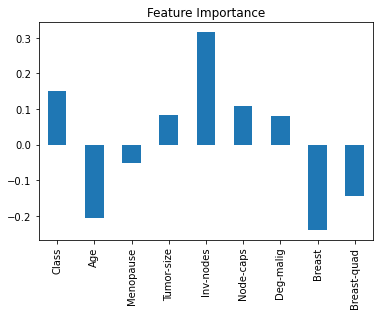

In [131]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
fig=features_df.T.plot.bar(title="Feature Importance", legend=False);
plt.savefig('Graph37.png')
plt.show()

we notice some are negative and some are positive.

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values. 

### Implying Modelling on the Test Dataset

In [132]:
# divide data into train and test
np.random.seed(0)
test_X = df_test.drop(columns=['Irradiat'], axis = 1)
test_y = df_test.Irradiat

### Feature Scaling on the Test Dataset

In [133]:
num_cols=test_X.select_dtypes(include=['int64', 'int8']).columns
test_X[num_cols] = scaler.fit_transform(test_X[num_cols])
test_X.head()

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad
0,0.0,-1.165998,0.5,-1.032094,0.636364,1.0,-0.654654,0.816497,0.000000
1,0.0,0.953998,0.5,-1.032094,-1.181818,1.0,-0.654654,-1.224745,0.000000
2,0.0,-0.106000,0.5,0.442326,1.545455,1.0,-0.654654,0.816497,0.000000
3,0.0,-0.106000,0.5,0.442326,1.545455,1.0,-0.654654,0.816497,1.118034
4,0.0,-0.106000,0.5,1.179536,-0.272727,1.0,1.527525,0.816497,0.000000


### Prediction/Classification on the Test Dataset

In [134]:
df_test["Predicted"]=clf.predict(test_X)

In [135]:
probability_values=pd.DataFrame(clf.predict_proba(test_X),columns=["No Treament","Treament"])

In [136]:
probability_values

,No Treament,Treament
0,0.480368,0.519632
1,0.609759,0.390241
2,0.433159,0.566841
3,0.473338,0.526662
4,0.517287,0.482713
5,0.452204,0.547796
6,0.584313,0.415687
7,0.630347,0.369653
8,0.540772,0.459228
9,0.557060,0.442940


In [137]:
df_test_original=pd.read_excel("Test_Breast_Cancer.xlsx")

In [138]:
df_test=df_test.drop(['Class', 'Age', 'Menopause', 'Tumor-size', 'Inv-nodes', 
             'Node-caps', 'Deg-malig', 'Breast', 'Breast-quad', 'Irradiat'],axis=1)

### Displaying the prediction on the Test Dataset

In [139]:
df_test_original=pd.concat([df_test_original,df_test,probability_values],axis=1)

In [140]:
df_test_original.head()

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat,Predicted,No Treament,Treament
0,no-recurrence-events,30-39,premeno,25-29,6-8,yes,2,right,left_up,NaN,1,0.480368,0.519632
1,no-recurrence-events,50-59,premeno,25-29,NaN,yes,2,left,left_up,NaN,0,0.609759,0.390241
2,no-recurrence-events,40-49,premeno,35-39,9-11,yes,2,right,left_up,NaN,1,0.433159,0.566841
3,no-recurrence-events,40-49,premeno,35-39,9-11,yes,2,right,right_up,NaN,1,0.473338,0.526662
4,no-recurrence-events,40-49,premeno,40-44,3-5,yes,3,right,left_up,NaN,0,0.517287,0.482713


### Exporting the testdata to Excel

In [141]:
df_test_original.to_csv("Final_Prediction.csv")